In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('tgs00101.csv')

In [3]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [4]:
df.head()

,geo,geo_label,time_period,obs_value,obs_flag
0,AL01,Veri,2009,NaN,NaN
1,AL01,Veri,2010,NaN,NaN
2,AL01,Veri,2011,NaN,NaN
3,AL01,Veri,2012,NaN,NaN
4,AL01,Veri,2013,NaN,NaN


In [5]:
df.drop(columns=['obs_flag'], inplace=True)

In [6]:
# Drop 2019 and 2020 as we are using absolute values and Uk is missing after 2018
filter = (df['time_period'] == 2019) | (df['time_period'] == 2020)
df.drop(index=df[filter].index, inplace=True)

In [7]:
# Replace all NaN with 0
df.fillna(0, inplace=True)
df.head()

,geo,geo_label,time_period,obs_value
0,AL01,Veri,2009,0.0
1,AL01,Veri,2010,0.0
2,AL01,Veri,2011,0.0
3,AL01,Veri,2012,0.0
4,AL01,Veri,2013,0.0


In [8]:
df.dtypes

geo             object
geo_label       object
time_period      int64
obs_value      float64
dtype: object

In [9]:
df['geo_country'] = df['geo'].str[:2]

In [34]:
df.to_csv('tgs.csv', index=False)

In [27]:
Country = 'Italy'
test = df[df['geo_country'] == 'IT']
test.head()

,geo,geo_label,time_period,obs_value,geo_country
2004,ITC1,Piemonte,2009,81.7,IT
2005,ITC1,Piemonte,2010,82.2,IT
2006,ITC1,Piemonte,2011,82.3,IT
2007,ITC1,Piemonte,2012,82.4,IT
2008,ITC1,Piemonte,2013,82.7,IT


In [31]:
test[test['time_period'] == 2018]

,geo,geo_label,time_period,obs_value,geo_country
2013,ITC1,Piemonte,2018,83.0,IT
2025,ITC2,Valle d'Aosta/Vallée d'Aoste,2018,82.3,IT
2037,ITC3,Liguria,2018,83.1,IT
2049,ITC4,Lombardia,2018,84.0,IT
2061,ITF1,Abruzzo,2018,83.6,IT
2073,ITF2,Molise,2018,83.3,IT
2085,ITF3,Campania,2018,81.9,IT
2097,ITF4,Puglia,2018,83.6,IT
2109,ITF5,Basilicata,2018,83.1,IT
2121,ITF6,Calabria,2018,83.0,IT


In [32]:
test2= test[test['time_period'] == 2018]

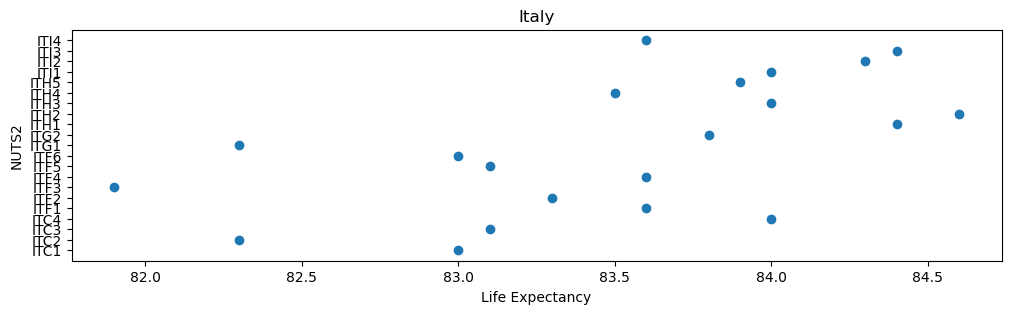

In [33]:
fig, axs = plt.subplots(figsize=(12, 3))
axs.scatter(test2['obs_value'], test2['geo'])
plt.title(Country)
plt.xlabel('Life Expectancy')
plt.ylabel('NUTS2')
# plt.yscale('log')
plt.show()